In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Data/Almond_world_data.csv")
df.head()

,Area,Year,Area harvested (ha),Production (t),Yield (kg/ha)
0,Australia and New Zealand,1980,1430.0,3500.0,2447.6
1,Australia and New Zealand,1981,1450.0,3250.0,2241.4
2,Australia and New Zealand,1982,1480.0,3450.0,2331.1
3,Australia and New Zealand,1983,1560.0,3600.0,2307.7
4,Australia and New Zealand,1984,1700.0,3700.0,2176.5


In [3]:
# knowing the included areas

print(df.Area.unique().tolist())

['Australia and New Zealand', 'Central America', 'Central Asia', 'Eastern Asia', 'Eastern Europe', 'Northern Africa', 'Northern America', 'Northern Europe', 'Oceania', 'South America', 'Southern Africa', 'Southern Asia', 'Southern Europe', 'Western Africa', 'Western Asia', 'Western Europe', 'World']


# Wrong trials for grouping the continents
Best Aggregation Functions for Annual Agricultural Data by Region:

Area harvested (ha):sum, Reason: Total area from all countries/regions adds up.

Production (t): sum, Reason: Total production is additive across regions.

Yield (kg/ha): Weighted mean based on area harvested, **not a simple mean.**

Formula: **Weighted Yield =∑(Yield×Area)/∑Area**

​Why?
Yield varies by area. Larger areas influence the true average yield more.
 


In [4]:
# Showing which region have the highest production
df.pivot_table(
    index=df.Area,
    values=["Area harvested (ha)", "Production (t)", "Yield (kg/ha)"],
    aggfunc="sum",
).sort_values(by="Production (t)", ascending=False)

,Area harvested (ha),Production (t),Yield (kg/ha)
Area,,,
World,90487363.0,1.023003e+08,65923.1
Northern America,12966892.0,4.358904e+07,172656.2
Southern Europe,45082914.0,2.671789e+07,37797.2
Northern Africa,20709968.0,9.083289e+06,24749.3
Western Asia,4506756.0,8.246424e+06,106866.9
Southern Asia,4966731.0,7.769481e+06,109855.4
Australia and New Zealand,617911.0,3.229610e+06,182758.4
Oceania,617911.0,3.229610e+06,182758.4
Eastern Asia,505001.0,1.584256e+06,98316.0


In [5]:
# Showing which region have the highest yield
df.pivot_table(
    index=df.Area,
    values=["Area harvested (ha)", "Production (t)", "Yield (kg/ha)"],
    aggfunc="sum", # WRONG, as the Yield should be average not sum
).sort_values(by="Yield (kg/ha)", ascending=False)

,Area harvested (ha),Production (t),Yield (kg/ha)
Area,,,
Australia and New Zealand,617911.0,3.229610e+06,182758.4
Oceania,617911.0,3.229610e+06,182758.4
Northern America,12966892.0,4.358904e+07,172656.2
Southern Asia,4966731.0,7.769481e+06,109855.4
Western Asia,4506756.0,8.246424e+06,106866.9
Eastern Asia,505001.0,1.584256e+06,98316.0
South America,255620.0,7.219604e+05,89538.9
Central America,3967.0,9.694670e+03,87018.0
World,90487363.0,1.023003e+08,65923.1


In [6]:
# It appears that Oceana and Australia and New Zealand	are the same, We eill drop "Australia and New Zealand" and keep Oceania
df[df.Area == "Australia and New Zealand"].shape

(44, 5)

In [7]:
df[df.Area != "Australia and New Zealand"].shape

(865, 5)

In [8]:
df = df[df.Area != "Australia and New Zealand"]

In [9]:
# to remove Northern Europe as well, in one line we should have used the following:

df = df[~df.Area.isin(["Australia and New Zealand", "Northern Europe"])]
df.shape

(859, 5)

In [10]:
# Showing which region have the highest yield
df_no_time = (
    df.pivot_table(
        index=df.Area,
        values=["Area harvested (ha)", "Production (t)", "Yield (kg/ha)"],
        aggfunc={
            "Area harvested (ha)": "sum",
            "Production (t)": "sum",
            "Yield (kg/ha)": "mean",
        },
        dropna=True,
    )
    .sort_values(by="Yield (kg/ha)", ascending=False)
    .reset_index()
)

df_no_time

,Area,Area harvested (ha),Production (t),Yield (kg/ha)
0,Oceania,617911.0,3.229610e+06,4153.600000
1,Northern America,12966892.0,4.358904e+07,2740.574603
2,Eastern Asia,505001.0,1.584256e+06,2520.923077
3,South America,255620.0,7.219604e+05,2295.869231
4,Central America,3967.0,9.694670e+03,1977.681818
5,Central Asia,385950.0,7.182966e+05,1929.415625
6,Southern Asia,4966731.0,7.769481e+06,1743.736508
7,Western Asia,4506756.0,8.246424e+06,1696.300000
8,Western Europe,60667.0,1.570905e+05,1372.456410
9,Southern Africa,21154.0,2.562919e+04,1237.333333


In [11]:
# Get the continentfrom Area
df_no_time["Continent"] = df_no_time["Area"].apply(
    lambda x: x.split()[1].strip() if len(x.split()) > 1 else x.strip()
)
df_no_time

,Area,Area harvested (ha),Production (t),Yield (kg/ha),Continent
0,Oceania,617911.0,3.229610e+06,4153.600000,Oceania
1,Northern America,12966892.0,4.358904e+07,2740.574603,America
2,Eastern Asia,505001.0,1.584256e+06,2520.923077,Asia
3,South America,255620.0,7.219604e+05,2295.869231,America
4,Central America,3967.0,9.694670e+03,1977.681818,America
5,Central Asia,385950.0,7.182966e+05,1929.415625,Asia
6,Southern Asia,4966731.0,7.769481e+06,1743.736508,Asia
7,Western Asia,4506756.0,8.246424e+06,1696.300000,Asia
8,Western Europe,60667.0,1.570905e+05,1372.456410,Europe
9,Southern Africa,21154.0,2.562919e+04,1237.333333,Africa


In [12]:
# Group by continent

df_no_time.pivot_table(
    index="Continent",
    values=["Area harvested (ha)", "Production (t)", "Yield (kg/ha)"],
    aggfunc={
        "Area harvested (ha)": "sum",
        "Production (t)": "sum",
        "Yield (kg/ha)": "mean",
    },
)

,Area harvested (ha),Production (t),Yield (kg/ha)
Continent,,,
Africa,20871435.0,9.187630e+06,723.243122
America,13226479.0,4.432069e+07,2338.041884
Asia,10364438.0,1.831846e+07,1972.593802
Europe,45407098.0,2.724394e+07,880.820228
Oceania,617911.0,3.229610e+06,4153.600000
World,90487363.0,1.023003e+08,1046.398413


# Correct concatenation of area



In [22]:
# first, we should get the continent

# Get the continentfrom Area
df["Continent"] = df["Area"].apply(
    lambda x: x.split()[1].strip() if len(x.split()) > 1 else x.strip()
)
df.sample(5)

,Area,Year,Area harvested (ha),Production (t),Yield (kg/ha),Continent
549,Southern Asia,1979,42300.0,81500.0,1926.7,Asia
314,Northern Africa,2010,412053.0,225577.0,547.4,Africa
364,Northern America,1997,181220.0,549000.0,3029.5,America
172,Eastern Asia,1994,10329.0,18000.0,1742.7,Asia
407,Oceania,1990,3000.0,5000.0,1666.7,Oceania


In [23]:
df_grouped = df.groupby("Continent").apply(
    lambda g: pd.Series({
        "Area harvested (ha)": g["Area harvested (ha)"].sum(),
        "Production (t)": g["Production (t)"].sum(),
        "Yield (kg/ha)": (g["Yield (kg/ha)"] * g["Area harvested (ha)"]).sum() / g["Area harvested (ha)"].sum()
    }),
    include_groups=False
).reset_index()
df_grouped

,Continent,Area harvested (ha),Production (t),Yield (kg/ha)
0,Africa,20871435.0,9.187630e+06,440.129683
1,America,13226479.0,4.432069e+07,3349.588618
2,Asia,10364438.0,1.831846e+07,1746.455147
3,Europe,45407098.0,2.724394e+07,594.113406
4,Oceania,617911.0,3.229610e+06,5226.650605
5,World,90487363.0,1.023003e+08,1130.554295


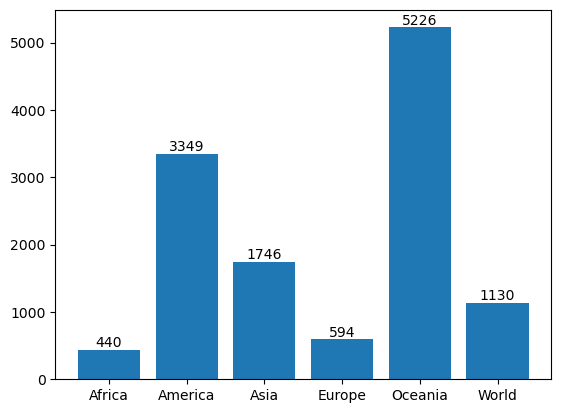

In [32]:
fig, ax = plt.subplots();
ax.bar(df_grouped.Continent,df_grouped['Yield (kg/ha)'], label=df_grouped['Yield (kg/ha)'])
ax.bar_label(ax.containers[0], fmt='%d');

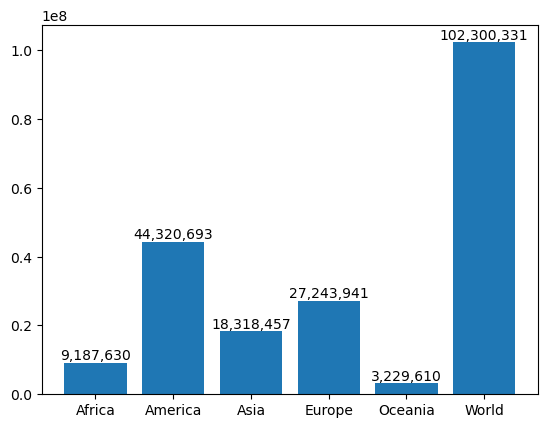

In [39]:
fig, ax = plt.subplots();
ax.bar(df_grouped.Continent,df_grouped['Production (t)'], label=df_grouped['Production (t)'])
ax.bar_label(ax.containers[0], fmt='{:,.0f}');

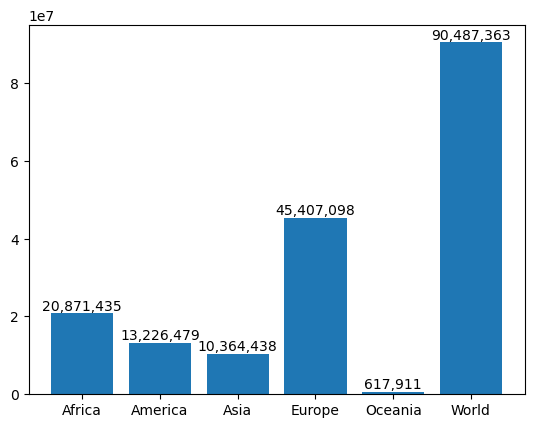

In [38]:
fig, ax = plt.subplots();
ax.bar(df_grouped.Continent,df_grouped['Area harvested (ha)'], label=df_grouped['Area harvested (ha)'])
ax.bar_label(ax.containers[0], fmt='{:,.0f}');